![JohnSnowLabs](https://nlp.johnsnowlabs.com/assets/images/logo.png)

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/JohnSnowLabs/nlu/blob/master/examples/multi_lingual_text_classification/colab/Training/multi_lingual/binary_text_classification/NLU_multi_lingual_training_sentiment_classifier_demo_reddit.ipynb)


# Training a Sentiment Analysis Classifier with NLU 
## 2 class Reddit comments sentiment classifier training
With the [SentimentDL model](https://nlp.johnsnowlabs.com/docs/en/annotators#sentimentdl-multi-class-sentiment-analysis-annotator)  from Spark NLP you can achieve State Of the Art results on any multi class text classification problem 

This notebook showcases the following features : 

- How to train the deep learning classifier
- How to store a pipeline to disk
- How to load the pipeline from disk (Enables NLU offline mode)

You can achieve these results or even better on this dataset with training  data  : 

<br> 

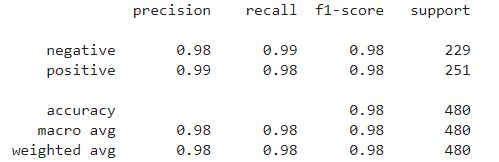


You can achieve these results or even better on this dataset with training  data  : 

<br> 

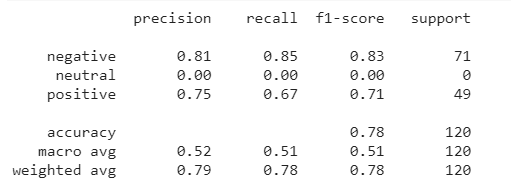

# 1. Install Java 8 and NLU

In [ ]:
import os
from sklearn.metrics import classification_report
! apt-get update -qq > /dev/null   
# Install java
! apt-get install -y openjdk-8-jdk-headless -qq > /dev/null
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["PATH"] = os.environ["JAVA_HOME"] + "/bin:" + os.environ["PATH"]
! pip install  pyspark==2.4.7 
! pip install nlu > /dev/null    



import nlu

     |████████████████████████████████| 217.9MB 77kB/s 
     |████████████████████████████████| 204kB 19.7MB/s 
  Created wheel for pyspark: filename=pyspark-2.4.7-py2.py3-none-any.whl size=218279465 sha256=32cc92322f5ad0116734a766394fc081f85f2ea384c673eb154fe7cee8b14f82
  Stored in directory: /root/.cache/pip/wheels/34/1f/2e/1e7460f80acf26b08dbb8c53d7ff9e07146f2a68dd5c732be5
Successfully built pyspark


# 2. Download Reddit  Sentiment dataset 
https://www.kaggle.com/cosmos98/twitter-and-reddit-sentimental-analysis-dataset
#Context

This is was a Dataset Created as a part of the university Project On Sentimental Analysis On Multi-Source Social Media Platforms using PySpark.

In [ ]:
! wget http://ckl-it.de/wp-content/uploads/2021/02/Reddit_Data_multi_lingual.csv


--2021-02-25 14:17:49--  http://ckl-it.de/wp-content/uploads/2021/02/Reddit_Data_multi_lingual.csv
Resolving ckl-it.de (ckl-it.de)... 217.160.0.108, 2001:8d8:100f:f000::209
Connecting to ckl-it.de (ckl-it.de)|217.160.0.108|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 193200 (189K) [text/csv]
Saving to: ‘Reddit_Data_multi_lingual.csv’

Reddit_Data_multi_l 100%[===================>] 188.67K  --.-KB/s    in 0.07s   

2021-02-25 14:17:50 (2.51 MB/s) - ‘Reddit_Data_multi_lingual.csv’ saved [193200/193200]



In [ ]:
import pandas as pd
train_path = '/content/Reddit_Data_multi_lingual.csv'

train_df = pd.read_csv(train_path)
# the text data to use for classification should be in a column named 'text'
columns=['text','y']
train_df = train_df[columns]
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(train_df, test_size=0.2)
train_df

,text,y
26,tea partier expresses support for namo after ...,negative
485,tried being secular before india after seeing...,positive
518,your stage you should strong enough take the ...,positive
299,they were worried about the woman rights they...,negative
107,please donâ editorialise post titles you ha...,negative
...,...,...
32,most religions have dogmatic orthodox well eso...,positive
126,keep fighting gif today twgok girls kusunoki k...,positive
531,take some notes valve this jpg really nice sla...,positive
440,great goal,positive


# 3. Train Deep Learning Classifier using nlu.load('train.sentiment')

You dataset label column should be named 'y' and the feature column with text data should be named 'text'

In [ ]:
trainable_pipe = nlu.load('xx.embed_sentence.labse train.sentiment')
# We need to train longer and user smaller LR for NON-USE based sentence embeddings usually
# We could tune the hyperparameters further with hyperparameter tuning methods like gridsearch
# Also longer training gives more accuracy
trainable_pipe['sentiment_dl'].setMaxEpochs(60)  
trainable_pipe['sentiment_dl'].setLr(0.005) 
fitted_pipe = trainable_pipe.fit(train_df)
# predict with the trainable pipeline on dataset and get predictions
preds = fitted_pipe.predict(train_df,output_level='document')

#sentence detector that is part of the pipe generates sone NaNs. lets drop them first
preds.dropna(inplace=True)
print(classification_report(preds['y'], preds['sentiment']))

preds

labse download started this may take some time.
Approximate size to download 1.7 GB
[OK!]
              precision    recall  f1-score   support

    negative       0.98      0.99      0.98       229
    positive       0.99      0.98      0.98       251

    accuracy                           0.98       480
   macro avg       0.98      0.98      0.98       480
weighted avg       0.98      0.98      0.98       480



,text,sentiment_confidence,sentiment,y,xx_embed_sentence_labse_embeddings,document
origin_index,,,,,,
26,tea partier expresses support for namo after ...,0.999853,negative,negative,"[0.010386765003204346, 0.024560054764151573, 0...",tea partier expresses support for namo after e...
485,tried being secular before india after seeing...,0.999999,positive,positive,"[-0.02900528907775879, 0.04157489538192749, -0...",tried being secular before india after seeing ...
518,your stage you should strong enough take the ...,0.999873,positive,positive,"[0.013262578286230564, 0.04397854581475258, -0...",your stage you should strong enough take the b...
299,they were worried about the woman rights they...,0.999381,negative,negative,"[0.04970186576247215, -0.02286474034190178, -0...",they were worried about the woman rights they ...
107,please donâ editorialise post titles you ha...,0.996976,negative,negative,"[-0.0039879390969872475, -0.013197453692555428...",please donâ editorialise post titles you hav...
...,...,...,...,...,...,...
32,most religions have dogmatic orthodox well eso...,0.997794,positive,positive,"[-0.01782401092350483, 0.008441080339252949, -...",most religions have dogmatic orthodox well eso...
126,keep fighting gif today twgok girls kusunoki k...,0.999957,positive,positive,"[0.06429395824670792, 0.006657848134636879, -0...",keep fighting gif today twgok girls kusunoki k...
531,take some notes valve this jpg really nice sla...,0.999426,positive,positive,"[-0.023985132575035095, -0.040043871849775314,...",take some notes valve this jpg really nice sla...


# 3.1 evaluate on Test Data

In [ ]:
preds = fitted_pipe.predict(test_df,output_level='document')

#sentence detector that is part of the pipe generates sone NaNs. lets drop them first
preds.dropna(inplace=True)
print(classification_report(preds['y'], preds['sentiment']))

              precision    recall  f1-score   support

    negative       0.81      0.85      0.83        71
     neutral       0.00      0.00      0.00         0
    positive       0.75      0.67      0.71        49

    accuracy                           0.78       120
   macro avg       0.52      0.51      0.51       120
weighted avg       0.79      0.78      0.78       120



#4. Test Model  with  20 languages!

In [ ]:
train_df = pd.read_csv("Reddit_Data_multi_lingual.csv")
preds = fitted_pipe.predict(train_df[["test_sentences","y"]].iloc[:100],output_level='document')

#sentence detector that is part of the pipe generates sone NaNs. lets drop them first
preds.dropna(inplace=True)
print(classification_report(preds['y'], preds['sentiment']))

preds

              precision    recall  f1-score   support

    negative       0.80      0.83      0.82        48
     neutral       0.00      0.00      0.00         0
    positive       0.84      0.79      0.81        52

    accuracy                           0.81       100
   macro avg       0.55      0.54      0.54       100
weighted avg       0.82      0.81      0.81       100



,text,sentiment_confidence,sentiment,y,xx_embed_sentence_labse_embeddings,document
origin_index,,,,,,
0,"je pravda, že přerušili moc, jaký kongres douc...",0.901069,negative,positive,"[0.04707138240337372, -0.02307470142841339, -0...","je pravda, že přerušili moc, jaký kongres douc..."
1,今月のようにジルーをより良く仕上げる,1.000000,positive,positive,"[-0.016900546848773956, -0.02084471471607685, ...",今月のようにジルーをより良く仕上げる
2,נראה חרא עכשיו אבל עדיין גאה,0.994826,positive,positive,"[-0.02598225139081478, -0.02113635651767254, -...",נראה חרא עכשיו אבל עדיין גאה
3,פלור הבוער שונא את האל הרע הטוב ביותר,0.999867,negative,negative,"[-0.04441581293940544, -0.010804536752402782, ...",פלור הבוער שונא את האל הרע הטוב ביותר
4,पूछ सकते हैं कि आप इस शक्तिशाली चीज़ के साथ क्...,0.853560,positive,positive,"[0.04069403186440468, -0.027412423864006996, 0...",पूछ सकते हैं कि आप इस शक्तिशाली चीज़ के साथ क्...
...,...,...,...,...,...,...
95,这并不奇怪,0.916389,negative,positive,"[0.026199793443083763, -0.061731234192848206, ...",这并不奇怪
96,এই পোস্টটি বিধি লঙ্ঘন করে সর্বশেষে আপনার ছাগল ...,0.999999,negative,negative,"[0.03437671437859535, -0.03329189494252205, -0...",এই পোস্টটি বিধি লঙ্ঘন করে সর্বশেষে আপনার ছাগল ...
97,سنا ہے براہ راست لائن نریندر مودی ہے جو کسی بھ...,0.999968,positive,positive,"[-0.0582120418548584, 0.05610270798206329, 0.0...",سنا ہے براہ راست لائن نریندر مودی ہے جو کسی بھ...


# The Model understands Englsih
![en](https://www.worldometers.info/img/flags/small/tn_nz-flag.gif)

In [ ]:
fitted_pipe.predict("I am depressed because of my recent break up and I spend all my time crying, I want the pain to go away... ")


,sentiment_confidence,sentiment,xx_embed_sentence_labse_embeddings,document
origin_index,,,,
0,0.999973,negative,"[-0.023605991154909134, -0.028282877057790756,...",I am depressed because of my recent break up a...


In [ ]:
fitted_pipe.predict("The love of my life proposed me , I feel like the happiest person alive!")

,sentiment_confidence,sentiment,xx_embed_sentence_labse_embeddings,document
origin_index,,,,
0,0.999999,positive,"[-0.005035023204982281, 0.022905221208930016, ...","The love of my life proposed me , I feel like ..."


# The Model understands German
![de](https://www.worldometers.info/img/flags/small/tn_gm-flag.gif)

In [ ]:
# German for:'The love of my life proposed me , I feel like the happiest person alive!'
fitted_pipe.predict("Die Liebe meines Lebens schlug mich vor, ich fühle mich wie die glücklichste Person am Leben!")

,sentiment_confidence,sentiment,xx_embed_sentence_labse_embeddings,document
origin_index,,,,
0,0.999998,positive,"[0.006932579912245274, -0.00897424016147852, -...","Die Liebe meines Lebens schlug mich vor, ich f..."


In [ ]:
# German for: 'I am depressed because of my recent break up and I spend all my time crying, I want the pain to go away...'
fitted_pipe.predict("Ich bin wegen meiner kürzlichen Trennung depressiv und verbringe meine ganze Zeit damit zu weinen. Ich möchte, dass die Schmerzen verschwinden ... ")
		

,sentiment_confidence,sentiment,xx_embed_sentence_labse_embeddings,document
origin_index,,,,
0,0.999994,negative,"[-0.04037580266594887, -0.01992807351052761, 0...",Ich bin wegen meiner kürzlichen Trennung depre...


# The Model understands Chinese
![zh](https://www.worldometers.info/img/flags/small/tn_ch-flag.gif)

In [ ]:

# Chinese for: 'I am depressed because of my recent break up and I spend all my time crying, I want the pain to go away...'
fitted_pipe.predict("由于最近的分手，我感到沮丧，我花了所有的时间哭泣，我希望痛苦能够消失... ")
		

,sentiment_confidence,sentiment,xx_embed_sentence_labse_embeddings,document
origin_index,,,,
0,0.999958,negative,"[-0.04107382893562317, -0.04438792169094086, 0...",由于最近的分手，我感到沮丧，我花了所有的时间哭泣，我希望痛苦能够消失...


In [ ]:
# Chinese for : "The love of my life proposed me , I feel like the happiest person alive!"
fitted_pipe.predict("我一生的爱向我提出了我，我感觉自己是最幸福的人！")


,sentiment_confidence,sentiment,xx_embed_sentence_labse_embeddings,document
origin_index,,,,
0,1.000000,positive,"[-0.0253176037222147, -0.04454462602734566, -0...",我一生的爱向我提出了我，我感觉自己是最幸福的人！


# Model understands Afrikaans

![af](https://www.worldometers.info/img/flags/small/tn_sf-flag.gif)



In [ ]:
# Afrikaans for 'The love of my life proposed me , I feel like the happiest person alive!'
fitted_pipe.predict("Die liefde van my lewe het my voorgestel, ek voel soos die gelukkigste persoon wat lewendig is!")


,sentiment_confidence,sentiment,xx_embed_sentence_labse_embeddings,document
origin_index,,,,
0,0.999999,positive,"[-0.017393898218870163, 0.005962143652141094, ...","Die liefde van my lewe het my voorgestel, ek v..."


In [ ]:
#  Afrikaans for: 'I am depressed because of my recent break up and I spend all my time crying, I want the pain to go away...'
fitted_pipe.predict("Ek is depressief as gevolg van my onlangse breuk en ek spandeer al my tyd om te huil, ek wil hê dat die pyn moet verdwyn ... ")
		

,sentiment_confidence,sentiment,xx_embed_sentence_labse_embeddings,document
origin_index,,,,
0,0.999960,negative,"[-0.042933885008096695, -0.033448245376348495,...",Ek is depressief as gevolg van my onlangse bre...


# The model understands Vietnamese
![vi](https://www.worldometers.info/img/flags/small/tn_vm-flag.gif)

In [ ]:
# Vietnamese for : 'The love of my life proposed me , I feel like the happiest person alive!'
fitted_pipe.predict('Tình yêu của đời tôi đề xuất tôi, tôi cảm thấy như người hạnh phúc nhất còn sống!')


,sentiment_confidence,sentiment,xx_embed_sentence_labse_embeddings,document
origin_index,,,,
0,0.999998,positive,"[-0.03576834872364998, -0.0172688327729702, -0...","Tình yêu của đời tôi đề xuất tôi, tôi cảm thấy..."


In [ ]:
# Vietnamese for: 'I am depressed because of my recent break up and I spend all my time crying, I want the pain to go away...'
fitted_pipe.predict("Tôi chán nản vì cuộc chia tay gần đây và tôi dành toàn bộ thời gian để khóc, tôi muốn nỗi đau qua đi ... ")
		

,sentiment_confidence,sentiment,xx_embed_sentence_labse_embeddings,document
origin_index,,,,
0,0.999738,negative,"[-0.00911672506481409, -0.007585278246551752, ...",Tôi chán nản vì cuộc chia tay gần đây và tôi d...


# The model understands Japanese
![ja](https://www.worldometers.info/img/flags/small/tn_ja-flag.gif)


In [ ]:

# Japanese for : 'The love of my life proposed me , I feel like the happiest person alive!'
fitted_pipe.predict('私の人生の愛は私を提案しました、私は生きている最も幸せな人のように感じます！')

,sentiment_confidence,sentiment,xx_embed_sentence_labse_embeddings,document
origin_index,,,,
0,0.999999,positive,"[-0.011561025865375996, 0.009653945453464985, ...",私の人生の愛は私を提案しました、私は生きている最も幸せな人のように感じます！


In [ ]:
# Japanese for: 'I am depressed because of my recent break up and I spend all my time crying, I want the pain to go away...'
fitted_pipe.predict("私は最近の別れのために落ち込んでいて、私はずっと泣いて過ごしています、私は痛みを取り除きたいです... ")
		

,sentiment_confidence,sentiment,xx_embed_sentence_labse_embeddings,document
origin_index,,,,
0,0.999992,negative,"[-0.0351201631128788, -0.03604917600750923, 0....",私は最近の別れのために落ち込んでいて、私はずっと泣いて過ごしています、私は痛みを取り除きたい...


# The model understands Zulu
![zu](https://www.worldometers.info/img/flags/small/tn_sf-flag.gif)

In [ ]:
# Zulu for : 'The love of my life proposed me , I feel like the happiest person alive!'
fitted_pipe.predict('Uthando lwempilo yami lungihlongosile, ngizwa sengathi umuntu ojabule kunabo bonke ephila!')


,sentiment_confidence,sentiment,xx_embed_sentence_labse_embeddings,document
origin_index,,,,
0,0.999999,positive,"[-0.011278754100203514, -0.0050370218232274055...","Uthando lwempilo yami lungihlongosile, ngizwa ..."


In [ ]:
#  Zulu for: 'I am depressed because of my recent break up and I spend all my time crying, I want the pain to go away...'
fitted_pipe.predict("Ngicindezelekile ngenxa yokuhlukana kwami kwakamuva futhi ngichitha sonke isikhathi sami ngikhala, ngifuna ubuhlungu buphele ... ")
		

,sentiment_confidence,sentiment,xx_embed_sentence_labse_embeddings,document
origin_index,,,,
0,0.999986,negative,"[-0.01392589695751667, -0.0321076363325119, 0....",Ngicindezelekile ngenxa yokuhlukana kwami kwak...


# The  Model understands Turkish
![tr](https://www.worldometers.info/img/flags/small/tn_tu-flag.gif)

In [ ]:
# Turkish for : 'The love of my life proposed me , I feel like the happiest person alive!'
fitted_pipe.predict('Hayatımın aşkı bana teklif etti, yaşayan en mutlu insan gibi hissediyorum! ')



,sentiment_confidence,sentiment,xx_embed_sentence_labse_embeddings,document
origin_index,,,,
0,0.999998,positive,"[0.0015444562304764986, 0.01713963784277439, -...","Hayatımın aşkı bana teklif etti, yaşayan en mu..."


In [ ]:
#  Turkish for: 'I am depressed because of my recent break up and I spend all my time crying, I want the pain to go away...'
fitted_pipe.predict("Son ayrılığımdan dolayı depresyondayım ve tüm zamanımı ağlayarak geçiriyorum, acının gitmesini istiyorum ... ")


,sentiment_confidence,sentiment,xx_embed_sentence_labse_embeddings,document
origin_index,,,,
0,0.999989,negative,"[-0.048465922474861145, -0.041023433208465576,...",Son ayrılığımdan dolayı depresyondayım ve tüm ...


#  The Model understands Hebrew
![he](https://www.worldometers.info/img/flags/small/tn_sf-flag.gif)

In [ ]:
# Hebrew for: 'I am depressed because of my recent break up and I spend all my time crying, I want the pain to go away...'
fitted_pipe.predict("אני בדיכאון בגלל הפרידה האחרונה שלי ואני מבלה את כל זמני בבכי, אני רוצה שהכאב ייעלם ... ")
		

,sentiment_confidence,sentiment,xx_embed_sentence_labse_embeddings,document
origin_index,,,,
0,0.999986,negative,"[-0.04138199985027313, -0.05670205503702164, 0...",אני בדיכאון בגלל הפרידה האחרונה שלי ואני מבלה ...


In [ ]:
# Hebrew for : 'The love of my life proposed me , I feel like the happiest person alive!'
fitted_pipe.predict('אהבת חיי הציעה אותי, אני מרגישה כמו האדם המאושר ביותר בחיים!')


,sentiment_confidence,sentiment,xx_embed_sentence_labse_embeddings,document
origin_index,,,,
0,1.000000,positive,"[-0.021271968260407448, -0.021334702149033546,...","אהבת חיי הציעה אותי, אני מרגישה כמו האדם המאוש..."


# The Model understands Telugu
![te](https://www.worldometers.info/img/flags/small/tn_in-flag.gif)


In [ ]:
# Telugu for : 'The love of my life proposed me , I feel like the happiest person alive!'
fitted_pipe.predict('నా జీవితం యొక్క ప్రేమ నన్ను ప్రతిపాదించింది, సజీవంగా ఉన్న వ్యక్తిగా నేను భావిస్తున్నాను!' )

,sentiment_confidence,sentiment,xx_embed_sentence_labse_embeddings,document
origin_index,,,,
0,0.999574,positive,"[-0.011076054535806179, -0.022865092381834984,...","నా జీవితం యొక్క ప్రేమ నన్ను ప్రతిపాదించింది, స..."


In [ ]:

# Telugu for: 'I am depressed because of my recent break up and I spend all my time crying, I want the pain to go away...'
fitted_pipe.predict("నా ఇటీవలి విడిపోవడం వల్ల నేను నిరాశకు గురయ్యాను మరియు నా సమయాన్ని ఏడుస్తూనే ఉన్నాను, నొప్పి పోవాలని నేను కోరుకుంటున్నాను ... ")


,sentiment_confidence,sentiment,xx_embed_sentence_labse_embeddings,document
origin_index,,,,
0,0.999970,negative,"[-0.025107212364673615, -0.03688900172710419, ...",నా ఇటీవలి విడిపోవడం వల్ల నేను నిరాశకు గురయ్యాన...


# Model understands Russian
![ru](https://www.worldometers.info/img/flags/small/tn_rs-flag.gif)


In [ ]:
#  Russian for: 'I am depressed because of my recent break up and I spend all my time crying, I want the pain to go away...'
fitted_pipe.predict("Я в депрессии из-за моего недавнего разрыва, и я все время плачу, я хочу, чтобы боль ушла ... ")
		

,sentiment_confidence,sentiment,xx_embed_sentence_labse_embeddings,document
origin_index,,,,
0,0.999982,negative,"[-0.04230489954352379, -0.02028733491897583, 0...","Я в депрессии из-за моего недавнего разрыва, и..."


In [ ]:
# Russian for : 'The love of my life proposed me , I feel like the happiest person alive!'
fitted_pipe.predict('Этот фильм был отличным!')

,sentiment_confidence,sentiment,xx_embed_sentence_labse_embeddings,document
origin_index,,,,
0,1.000000,positive,"[-0.03249521926045418, -0.04056306555867195, -...",Этот фильм был отличным!


# Model understands Urdu
![ur](https://www.worldometers.info/img/flags/small/tn_pk-flag.gif)

In [ ]:
# Urdu for: 'I am depressed because of my recent break up and I spend all my time crying, I want the pain to go away...'
fitted_pipe.predict("میں حالیہ بریک اپ کی وجہ سے افسردہ ہوں اور میں اپنا سارا وقت روتے ہوئے گزارتا ہوں ، میں چاہتا ہوں کہ درد دور ہو ... ")
		

,sentiment_confidence,sentiment,xx_embed_sentence_labse_embeddings,document
origin_index,,,,
0,0.999937,negative,"[-0.03198534622788429, -0.04250375181436539, 0...",میں حالیہ بریک اپ کی وجہ سے افسردہ ہوں اور میں...


In [ ]:
# Urdu for : 'The love of my life proposed me , I feel like the happiest person alive!'
fitted_pipe.predict('میری زندگی کی محبت نے مجھے پیش کیا، مجھے سب سے خوشگوار شخص زندہ لگتا ہے!')

,sentiment_confidence,sentiment,xx_embed_sentence_labse_embeddings,document
origin_index,,,,
0,0.999997,positive,"[-0.014539845287799835, -0.022852811962366104,...",میری زندگی کی محبت نے مجھے پیش کیا، مجھے سب سے...


# Model understands Hindi
![hi](https://www.worldometers.info/img/flags/small/tn_in-flag.gif)


In [ ]:
# Hindi for : 'The love of my life proposed me , I feel like the happiest person alive!'
fitted_pipe.predict('मेरे जीवन के प्यार ने मुझे प्रस्तावित किया, मुझे लगता है कि सबसे खुश व्यक्ति जीवित है!')

,sentiment_confidence,sentiment,xx_embed_sentence_labse_embeddings,document
origin_index,,,,
0,0.999987,positive,"[-0.007552078925073147, 0.003644779557362199, ...","मेरे जीवन के प्यार ने मुझे प्रस्तावित किया, मु..."


In [ ]:
# Hindi for: 'I am depressed because of my recent break up and I spend all my time crying, I want the pain to go away...'
fitted_pipe.predict("मेरे हालिया ब्रेक अप के कारण मैं उदास हूं और मैं अपना सारा समय रोने में बिताता हूं, मैं चाहता हूं कि दर्द दूर हो जाए ... ")
		

,sentiment_confidence,sentiment,xx_embed_sentence_labse_embeddings,document
origin_index,,,,
0,0.999950,negative,"[-0.03387507051229477, -0.03928767517209053, 0...",मेरे हालिया ब्रेक अप के कारण मैं उदास हूं और म...


# The model understands Tartar
![tt](https://www.worldometers.info/img/flags/small/tn_rs-flag.gif)

In [ ]:
# Tartar for: 'I am depressed because of my recent break up and I spend all my time crying, I want the pain to go away...'
fitted_pipe.predict("Соңгы аерылышуым аркасында мин депрессияләнәм һәм бөтен вакытымны елыйм, авыртуның китүен телим ... ")
		

,sentiment_confidence,sentiment,xx_embed_sentence_labse_embeddings,document
origin_index,,,,
0,0.999960,negative,"[-0.04341090843081474, -0.044361814856529236, ...",Соңгы аерылышуым аркасында мин депрессияләнәм ...


In [ ]:
# Tartar for : 'The love of my life proposed me , I feel like the happiest person alive!'
fitted_pipe.predict('Тормышымның мәхәббәте миңа тәкъдим итте, мин үземне иң бәхетле кеше кебек хис итәм!')

,sentiment_confidence,sentiment,xx_embed_sentence_labse_embeddings,document
origin_index,,,,
0,0.999999,positive,"[-0.002561990637332201, -0.02031663805246353, ...","Тормышымның мәхәббәте миңа тәкъдим итте, мин ү..."


# The Model understands French
![fr](https://www.worldometers.info/img/flags/small/tn_fr-flag.gif)

In [ ]:
# French for: 'I am depressed because of my recent break up and I spend all my time crying, I want the pain to go away...'
fitted_pipe.predict("Je suis déprimé à cause de ma récente rupture et je passe tout mon temps à pleurer, je veux que la douleur disparaisse ... ")
		

,sentiment_confidence,sentiment,xx_embed_sentence_labse_embeddings,document
origin_index,,,,
0,0.999986,negative,"[-0.0261949822306633, -0.031189769506454468, 0...",Je suis déprimé à cause de ma récente rupture ...


In [ ]:
# French for : 'The love of my life proposed me , I feel like the happiest person alive!'
fitted_pipe.predict("L'amour de ma vie m'a proposé, je me sens comme la personne la plus heureuse en vie!")

,sentiment_confidence,sentiment,xx_embed_sentence_labse_embeddings,document
origin_index,,,,
0,1.000000,positive,"[-0.01895563304424286, -0.02439437434077263, -...","L'amour de ma vie m'a proposé, je me sens comm..."


# The Model understands Thai
![th](https://www.worldometers.info/img/flags/small/tn_th-flag.gif)

In [ ]:
# Thai for : 'The love of my life proposed me , I feel like the happiest person alive!'
fitted_pipe.predict("ความรักในชีวิตของฉันเสนอให้ฉันฉันรู้สึกเหมือนคนที่มีความสุขที่สุดที่มีชีวิตอยู่!")

,sentiment_confidence,sentiment,xx_embed_sentence_labse_embeddings,document
origin_index,,,,
0,0.999998,positive,"[-0.031056925654411316, -0.04219935089349747, ...",ความรักในชีวิตของฉันเสนอให้ฉันฉันรู้สึกเหมือนค...


In [ ]:
# Thai for: 'I am depressed because of my recent break up and I spend all my time crying, I want the pain to go away...'
fitted_pipe.predict("ฉันรู้สึกหดหู่ใจเพราะเพิ่งเลิกกันและฉันใช้เวลาร้องไห้ตลอดเวลาฉันอยากให้ความเจ็บปวดหายไป ... ")
		

,sentiment_confidence,sentiment,xx_embed_sentence_labse_embeddings,document
origin_index,,,,
0,0.999848,negative,"[-0.014413643628358841, -0.05407709628343582, ...",ฉันรู้สึกหดหู่ใจเพราะเพิ่งเลิกกันและฉันใช้เวลา...


# The Model understands Khmer
![km](https://www.worldometers.info/img/flags/small/tn_cb-flag.gif)

In [ ]:
# Khmer for : 'The love of my life proposed me , I feel like the happiest person alive!'
fitted_pipe.predict("សេចក្តីស្រឡាញ់នៃជីវិតរបស់ខ្ញុំបានស្នើខ្ញុំខ្ញុំមានអារម្មណ៍ថាដូចជាមនុស្សដែលសប្បាយរីករាយបំផុតនៅរស់! ")

,sentiment_confidence,sentiment,xx_embed_sentence_labse_embeddings,document
origin_index,,,,
0,0.999999,positive,"[0.0028431271202862263, -0.021134141832590103,...",សេចក្តីស្រឡាញ់នៃជីវិតរបស់ខ្ញុំបានស្នើខ្ញុំខ្ញុ...


In [ ]:
# Khmer for: 'I am depressed because of my recent break up and I spend all my time crying, I want the pain to go away...'
fitted_pipe.predict("ខ្ញុំក្រៀមក្រំណាស់ដោយសារតែការបែកបាក់ថ្មីៗនេះហើយខ្ញុំចំណាយពេលវេលាយំអស់មួយជីវិតខ្ញុំចង់អោយការឈឺចាប់បាត់ទៅវិញ ... ")
		

,sentiment_confidence,sentiment,xx_embed_sentence_labse_embeddings,document
origin_index,,,,
0,0.999994,negative,"[-0.02485613152384758, -0.053151313215494156, ...",ខ្ញុំក្រៀមក្រំណាស់ដោយសារតែការបែកបាក់ថ្មីៗនេះហើ...


# The Model understands Yiddish
![yi](https://www.worldometers.info/img/flags/small/tn_pl-flag.gif)

In [ ]:
# Yiddish for : 'The love of my life proposed me , I feel like the happiest person alive!'
fitted_pipe.predict("די ליבע פון מיין לעבן פארגעלייגט מיר, איך פילן ווי די כאַפּיאַסט מענטש לעבעדיק!")

,sentiment_confidence,sentiment,xx_embed_sentence_labse_embeddings,document
origin_index,,,,
0,0.999996,positive,"[-0.019913040101528168, 0.015512144193053246, ...","די ליבע פון מיין לעבן פארגעלייגט מיר, איך פילן..."


In [ ]:
# Yiddish for: 'I am depressed because of my recent break up and I spend all my time crying, I want the pain to go away...'
fitted_pipe.predict("איך בין דערשלאָגן ווייַל פון מיין לעצטנס ברעכן זיך און איך פאַרברענגען אַלע מיין צייט וויינען, איך ווילן די ווייטיק וועט גיין אַוועק ... ")
		

,sentiment_confidence,sentiment,xx_embed_sentence_labse_embeddings,document
origin_index,,,,
0,0.999903,negative,"[-0.02142147719860077, -0.04973935708403587, 0...",איך בין דערשלאָגן ווייַל פון מיין לעצטנס ברעכן...


# The Model understands Kygrgyz
![ky](https://www.worldometers.info/img/flags/small/tn_kg-flag.gif)

In [ ]:
# Kygrgyz for : 'The love of my life proposed me , I feel like the happiest person alive!'
fitted_pipe.predict("Менин жашоомдун сүйүүсү мени сунуш кылды, мен өзүмдү бактылуу адамдай сезип жатам!|")

,sentiment_confidence,sentiment,xx_embed_sentence_labse_embeddings,document
origin_index,,,,
0,0.999970,positive,"[-0.030747272074222565, -0.025966472923755646,...","Менин жашоомдун сүйүүсү мени сунуш кылды, мен ..."


In [ ]:

# Kygrgyz for: 'I am depressed because of my recent break up and I spend all my time crying, I want the pain to go away...'
fitted_pipe.predict("Менин акыркы ажырашуумдан улам депрессияга кабылып, бардык убактымды ыйлап өткөрөм, азаптын басылышын каалайм ... ")
		

,sentiment_confidence,sentiment,xx_embed_sentence_labse_embeddings,document
origin_index,,,,
0,0.999924,negative,"[-0.04204170033335686, -0.02293466404080391, 0...",Менин акыркы ажырашуумдан улам депрессияга каб...


# The Model understands Tamil
![ta](https://www.worldometers.info/img/flags/small/tn_in-flag.gif)

In [ ]:
# Tamil for: 'I am depressed because of my recent break up and I spend all my time crying, I want the pain to go away...'
fitted_pipe.predict("நான் சமீபத்தில் பிரிந்ததால் மனச்சோர்வடைந்து, என் நேரத்தை அழுதபடி செலவிடுகிறேன், வலி நீங்க வேண்டும் என்று நான் விரும்புகிறேன் ... ")
		

,sentiment_confidence,sentiment,xx_embed_sentence_labse_embeddings,document
origin_index,,,,
0,0.999895,negative,"[-0.023217450827360153, -0.035981468856334686,...","நான் சமீபத்தில் பிரிந்ததால் மனச்சோர்வடைந்து, எ..."


In [ ]:
# Tamil for : 'The love of my life proposed me , I feel like the happiest person alive!'
fitted_pipe.predict("என் வாழ்க்கையின் அன்பு என்னை முன்மொழிந்தது, உயிருடன் இருக்கும் மகிழ்ச்சியான நபராக நான் உணர்கிறேன்! ")

,sentiment_confidence,sentiment,xx_embed_sentence_labse_embeddings,document
origin_index,,,,
0,0.999990,positive,"[-0.0001591969921719283, -0.012185919098556042...","என் வாழ்க்கையின் அன்பு என்னை முன்மொழிந்தது, உய..."


# 5. Lets save the model

In [ ]:
stored_model_path = './models/classifier_dl_trained' 
fitted_pipe.save(stored_model_path)

Stored model in ./models/classifier_dl_trained


# 6. Lets load the model from HDD.
This makes Offlien NLU usage possible!   
You need to call nlu.load(path=path_to_the_pipe) to load a model/pipeline from disk.

In [ ]:
stored_model_path = './models/classifier_dl_trained' 
hdd_pipe = nlu.load(path=stored_model_path)
preds = hdd_pipe.predict('It was one of the best films i have ever watched in my entire life !!')
preds

,sentiment_confidence,xx_embed_sentence_labse_embeddings,sentiment,document
origin_index,,,,
0,0.999920,"[0.011100736446678638, -0.0029744331259280443,...",positive,It was one of the best films i have ever watch...


In [ ]:
hdd_pipe.print_info()

The following parameters are configurable for this NLU pipeline (You can copy paste the examples) :
>>> pipe['document_assembler'] has settable params:
pipe['document_assembler'].setCleanupMode('shrink')        | Info: possible values: disabled, inplace, inplace_full, shrink, shrink_full, each, each_full, delete_full | Currently set to : shrink
>>> pipe['regex_tokenizer'] has settable params:
pipe['regex_tokenizer'].setCaseSensitiveExceptions(True)   | Info: Whether to care for case sensitiveness in exceptions | Currently set to : True
pipe['regex_tokenizer'].setTargetPattern('\S+')            | Info: pattern to grab from text as token candidates. Defaults \S+ | Currently set to : \S+
pipe['regex_tokenizer'].setMaxLength(99999)                | Info: Set the maximum allowed length for each token | Currently set to : 99999
pipe['regex_tokenizer'].setMinLength(0)                    | Info: Set the minimum allowed length for each token | Currently set to : 0
>>> pipe['sentence_detector'] 